# Neural Networks More Hidden Neutrons¶
Table of Contents
* Preperation
* Get Our Data
* Define the Neural Network, Optimizer, and Train the Model

# Preparation

In [14]:
import torch
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

Defining the plotting functions

In [15]:
def get_hist(model, data_set):
    activations = model.activation(data_set.x)
    for i, activation in enumerate(activations):
        plt.hist(activation.numpy(), 4, density =True)
        plt.title('Activation Layer '+ str(i+1))
        plt.xlabel('Activation')
        plt.xlabel('activation')
        plt.legend()
        plt.show()

In [23]:
def PlotStuff(X,Y,model = None, leg =False):
    
    plt.plot(X[Y==0].numpy(), Y[Y==0].numpy(), 'or', label='training points y==0 ')
    plt.plot(X[Y==1].numpy(), Y[Y==1].numpy(), 'ob', label = 'training poinst y==1')
    
    
    if model!=None:
        plt.plot(X.numpy(), model(X).detach().numpy(), label = 'Neural Network')
        
    plt.legend()
    plt.show()

# Getting Our Data

Define the class to get our dataset

In [30]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)
        
        self.y =torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0]>-10) & (self.x[:, 0]<-5)] =1
        self.y[(self.x[:, 0]>5) & (self.x[:, 0]< 10)] =1
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

# Define the Neural Network, Optimizer and Train the Model

In [38]:
class Net(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)

        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))  
        x=torch.sigmoid(self.linear2(x))
        return x

In [46]:
def train(data_set, model, criterion, train_loader, optimizer, epoch=5, plot_number =10):
    cost = []
    
    for epoch in range(epoch):
        total = 0
        
        for x, y in train_loader:
            optimizer.zero_grad()
            
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            total+= loss.item()
            
        if epoch%plot_number==0:
            PlotStuff(data_set.x, data_set.y, model)
            
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [47]:
data_set = Data()

In [48]:
data_set

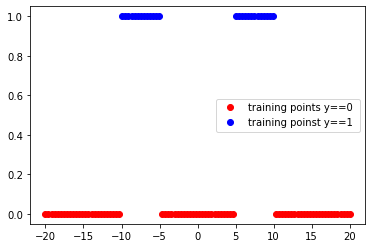

In [49]:
PlotStuff(data_set.x, data_set.y, leg = False)

Create our model with 9 neurons in the hidden layer. And then create a BCE loss and an Adam optimizer.

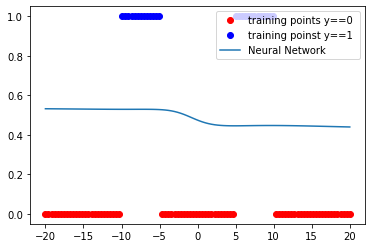

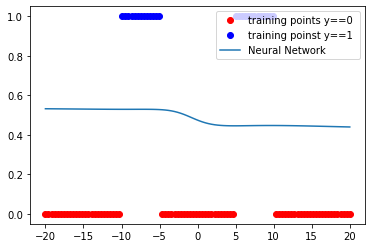

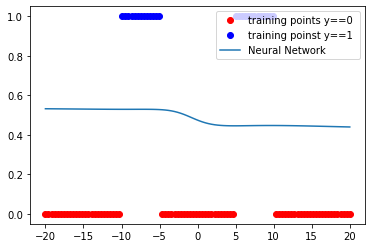

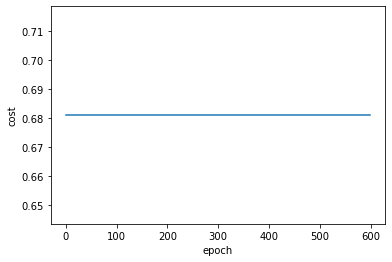

In [50]:
torch.manual_seed(0)
model = Net(1,9,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size = 100)
COST = train(data_set, model, criterion, train_loader, optimizer, epoch=600, plot_number=200)

In [58]:
# This is for exercises
model2 = torch.nn.Sequential( torch.nn.Linear(1,6),
                           torch.nn.Linear(1, 6),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(6, 1),
                           torch.nn.Sigmoid())
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size = 100)
#COST2 = train(data_set, model2, criterion, train_loader, optimizer, epoch=600, plot_number=200)

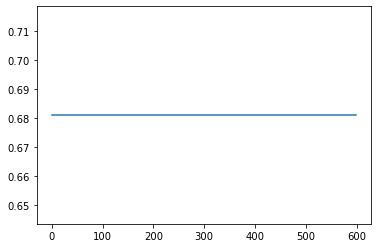

In [52]:
plt.plot(COST)